In [25]:
from nba_api.stats.static import teams
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2> Introduction </h2>
This is my introduction to the NBA stats API. I was having a conversation with my friends about pace in the NBA in playoff games versus the regular season so I wanted to develop some quick summary statistics. 
<break>
<h2>Methodology</h2>
To find pace on the NBA site for a given team its under the team stats page on the NBA stats page, so you find the corresponding endpoint from the API. I definied a function that found the playoff teams for a given year, and then found their pace both in the regular season and in playoffs, took the average of playoff/refular season pace for the whole of the NBA and then graphed it.

In [22]:
from nba_api.stats.endpoints import leaguedashteamstats


def getPace(year):
    #
    teams = playoffTeams(year)
    season=str(year) + "-" + str(year+1)[-2:]
    ret = dict()
    x = leaguedashteamstats.LeagueDashTeamStats(measure_type_detailed_defense="Advanced",season = season,season_type_all_star="Regular Season").get_dict()
    time.sleep(1)
    y = leaguedashteamstats.LeagueDashTeamStats(measure_type_detailed_defense="Advanced",season = season,season_type_all_star="Playoffs").get_dict()
    x = x['resultSets'][0]['rowSet']
    y = y['resultSets'][0]['rowSet']
    for team in teams:
        for i in x:
            if i[0] == team[0]:
                ret[team[1]] = [i[23]]
        for j in y:
            if j[0] == team[0]:
                ret[team[1]].append(j[23])
    return ret

def getPaceAvg(year):
    paces = getPace(year)
    reg,play = 0,0
    for team in paces:
        reg+=paces[team][0]
        play+=paces[team][1]
    reg/= len(paces)
    play/= len(paces)
    return [reg,play]


print(1)

1


In [46]:
from nba_api.stats.endpoints import leaguestandings
#get list of playoff teams for 2018-2019 season
def playoffTeams(year):
    #gets playoff teams from a given year, returns list of lists
    ret = []
    last = leaguestandings.LeagueStandings(season=year).get_dict()
    x =last['resultSets'][0]['rowSet']

    for team in x:
        if team[7] <= 8:
            ret.append([team[2],team[4]])
    return ret



In [159]:
import time
years = np.arange(1999,2019)
Pavgs = []
for i in years:
    Pavgs.append(getPaceAvg(i))
    time.sleep(3)
    print(i,end=", ")

1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 

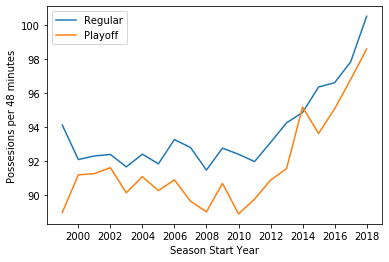

In [160]:
years = np.arange(1999,2019)
plt.plot(years,Pavgs)
plt.legend(["Regular","Playoff"])
plt.xlabel("Season Start Year")
plt.ylabel("Possesions per 48 minutes")
plt.xticks(np.arange(2000, 2019,2))
plt.show()

<h3> Hypotheses for two sampled T test for difference in means </h3>
$H_0: \mu_{reg} = \mu_{play}$<break>
    
$H_1: \mu_{reg} > \mu_{play}$


In [168]:
from scipy.stats import ttest_ind

reg = [i[0] for i in Pavgs]
play = [i[1] for i in Pavgs]

stat,p = ttest_ind(reg,play)
#Since this is a 2 tailed T test we divide the p value by 2
p = p/2
print(p)

0.008993844402145738


Thus, we reject the null hypothesis at a confidence level of 99%, and conclude that mean pace is greater in the regular season than in playoffs.

Contrary to my expectations, it appears that playoff pace slows compared to the regular season, which runs contrary to the belief that play elevates in the playoffs and as such moves faster. There could be unseen things at work here and this requires more investigation.

<h2> Spurs</h2>
Because I know the spurs have made the playoffs since 1197, I wanted to see what their pace was like

In [108]:
def spurs(year):
    teamID = 1610612759
    ret = []
    season=str(year) + "-" + str(year+1)[-2:]
    x = leaguedashteamstats.LeagueDashTeamStats(measure_type_detailed_defense="Advanced",season = season,season_type_all_star="Regular Season",team_id_nullable= teamID).get_dict()
    time.sleep(1)
    y = leaguedashteamstats.LeagueDashTeamStats(measure_type_detailed_defense="Advanced",season = season,season_type_all_star="Playoffs",team_id_nullable= teamID).get_dict()
    x = x['resultSets'][0]['rowSet'][0][23]
    y = y['resultSets'][0]['rowSet'][0][23]
    return [x,y]

def spursTime():
    years = np.arange(1997,2019)
    avgs = []
    for i in years:
        avgs.append(spurs(i))
        time.sleep(3)
        print(i,end=", ")
    return avgs



In [110]:
spursAvg = spursTime()


1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 

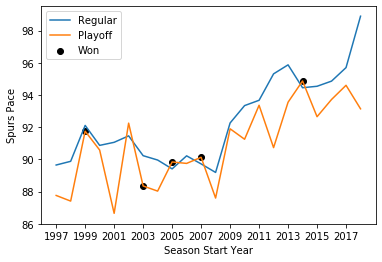

In [148]:
years = np.arange(1997,2019)
champs = [spursAvg[i-1997][1] for i in [1999,2003,2005,2007,2014]]
plt.plot(years,spursAvg)
plt.scatter([1999,2003,2005,2007,2014],champs,color='black')
plt.legend(["Regular","Playoff","Won"])
plt.xlabel("Season Start Year")
plt.ylabel("Spurs Pace")
plt.xticks(np.arange(1997,2019,2))

plt.yticks(np.arange(86,100,2))

plt.show()

<h3> Hypotheses for two sampled T test for difference in means </h3>
$H_0: \mu_{reg} = \mu_{play}$<break>
    
$H_1: \mu_{reg} > \mu_{play}$


In [170]:
reg = [i[0] for i in spursAvg]
play = [i[1] for i in spursAvg]

sstat,sp = ttest_ind(reg,play)
#Since this is a 2 tailed T test we divide the p value by 2
sp = sp/2
print(sp)

0.03187053177459999


Here, we can only reject the Null at the 95% confidence level, so although the difference in means between playoff and regular season basketball is still apparent, it is less strong than the league as a whole.

Although you see the same general upward trend in their pace over time,there is less of a clear cut difference with the Spurs.

<h2>Exploration in Percentage of 3-Point SHots</h2>
Just to get more familiar with the API, I decided to look to see if there was a differnce in 3-point Frequency between playoofs and regular season over the whole of the NBA. For this, this is only data from the 2012 Season onward, so the sample size is too small to run any sort of tests on it, but you do see the rise of the 3 point over all across the league.
    

In [85]:
from nba_api.stats.endpoints import leaguedashteamptshot

def get3pp(year):
    ret = dict()
    teams = playoffTeams(year)
    season=str(year) + "-" + str(year+1)[-2:]
    
    x  = leaguedashteamptshot.LeagueDashTeamPtShot(season = season,season_type_all_star="Regular Season").get_dict()
    indx=x['resultSets'][0]['headers'].index('FG3A_FREQUENCY')
    x = x['resultSets'][0]['rowSet']
    
    time.sleep(1)
    y = leaguedashteamptshot.LeagueDashTeamPtShot(season = season,season_type_all_star="Playoffs").get_dict()
    indy= y['resultSets'][0]['headers'].index('FG3A_FREQUENCY')
    y = y['resultSets'][0]['rowSet']
    
    for team in teams:
        for i in x:
            if i[0] == team[0]:
                ret[team[1]] = [i[indx]]
        for j in y:
            if j[0] == team[0]:
                ret[team[1]].append(j[indy])

    return ret

def get3ppAvg(year):
    three = get3pp(year)
    reg,play = 0,0
    for team in three:
        reg+=three[team][0]
        play+=three[team][1]
    reg/= len(three)
    play/= len(three)
    return [reg,play]

def get3ppAvgTime(start):
    years = np.arange(start,2019)
    avgs = []
    for i in years:
        avgs.append(get3ppAvg(i))
        time.sleep(3)
        print(i,end=", ")
    return avgs

In [93]:
avgs = get3ppAvgTime(2013)

2013, 2014, 2015, 2016, 2017, 2018, 

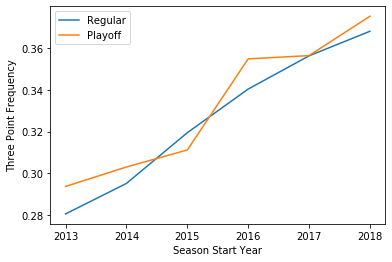

In [96]:
years = np.arange(2013,2019)
plt.plot(years,avgs)
plt.legend(["Regular","Playoff"])
plt.xlabel("Season Start Year")
plt.ylabel("Three Point Frequency")
plt.xticks(years)
plt.show()